<a href="https://colab.research.google.com/github/riccardomarin/SpectralShapeAnalysis/blob/master/Exercises_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
%matplotlib inline 

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.cluster import KMeans

**1D GRAPH**
---
We will implement the 1D graph we saw in the slides.

The tasks are:
- Compute the Laplacian
- Compute the eigenvectors
- Visualize them
- Define a function
- Perform low-pass filtering with increasing number of basis


In [40]:
# 1: build the graph
n = 50

# Constructing the adjacency matrix
A = np.zeros((n, n))
a = np.array([i for i in np.arange(1,n)]) 
A[np.arange(a.size),a] = 1

# Assuring it is symmetryc
A = np.logical_or(A, A.T).astype(np.int32)

# It generates something like this
# A = np.array([  [0,1,0,0,0],
#                 [1,0,1,0,0],
#                 [0,1,0,1,0],
#                 [0,0,1,0,1],
#                 [0,0,0,1,0]])

In [41]:
# 2: Compute the Laplacian
# Vertex degree
D = np.sum(A, axis=0)
L =   np.diag(D) - A


In [42]:
# 3: Compute the eigenvectors
a,b = np.linalg.eigh(L)


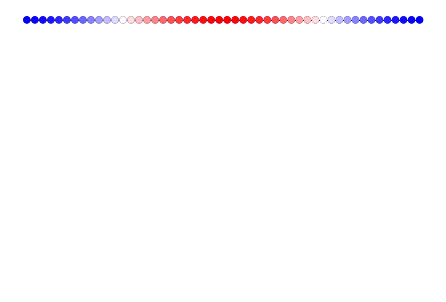

In [43]:
# 4: Plot the graph with one eigenfunction
eig_n = 2

G = nx.from_numpy_matrix(A)

pos = {i : np.asarray([i,0]) for i in np.arange(0,n)}
nx.draw(G,pos, node_color=np.ones(n) , node_size=40)
nx.draw(G,pos, node_color=b[:,2] , node_size=40, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))

plt.show()

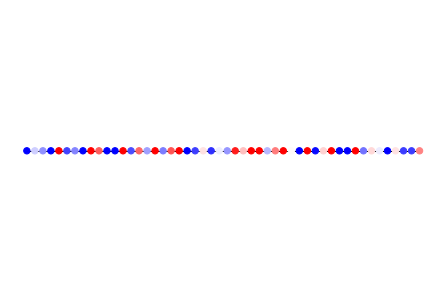

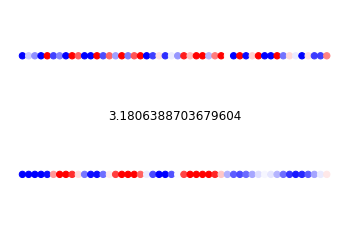

In [44]:
# 4: Low pass filtering

# Define a random function
coeffs = np.random.rand(b.shape[0])
f = np.matmul(coeffs,  b)

nx.draw(G,pos, node_color=f, node_size=40, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))
plt.show()


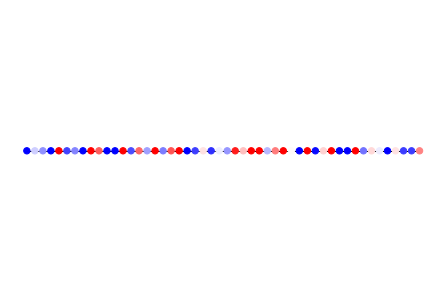

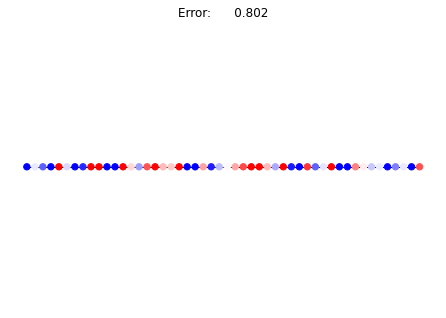

In [57]:
# Truncating the basis
b_trim = b[:,0:40]

# synthesis and analysis with truncated basis
f_recon = np.matmul(b_trim,np.matmul(b_trim.T, f))

# Computing the reconstruction error
err = np.sqrt(np.sum(np.square(f_recon - f)))


nx.draw(G,pos, node_color=f, node_size=40, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))
plt.show()


nx.draw(G,pos, node_color=f_recon, node_size=40, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))
plt.title('Error: ' + "{:10.3f}".format(err))
plt.show()


# **Disconnected Components**
---
Here we analyze the behavior of Laplacian and eigenfunction when the graph is disconnected.

The tasks are:
- Compute the Laplacian
- Compute the eigenfunction of the Laplacian
- Visualize the Laplacian
- Visualize the Eigenfunctions and the algebraic multiplicity of the 0 eigenvalue


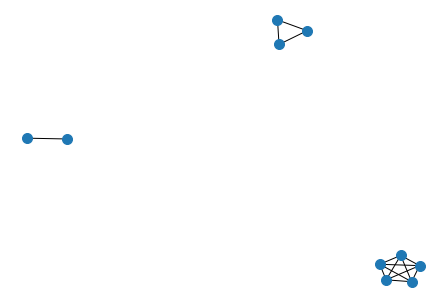

In [27]:
# 1: build the graph

s = np.asarray([1, 1, 2, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 5])-1
t = np.asarray([2, 3, 3, 7, 8, 9, 10, 8, 9, 10, 9, 10, 10, 4])-1

A = np.zeros((10,10))
A[s,t]=1
A = np.logical_or(A, A.T).astype(np.int32)

G = nx.from_numpy_matrix(A)
nx.draw(G, node_size=100)
plt.show()


In [7]:
# 2: Compute the Laplacian
D = np.sum(A, axis=0)
L = np.diag(D) - A

In [13]:
# 3: compute the eigenfunction and eigenvalues
a,b = np.linalg.eigh(L)

print(a)

[-2.22044605e-16  0.00000000e+00  0.00000000e+00  2.00000000e+00
  3.00000000e+00  3.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00]


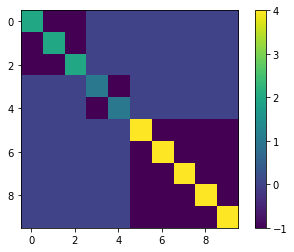

In [14]:
# 4: Show the laplacian
plt.imshow(L)
plt.colorbar()
plt.show()

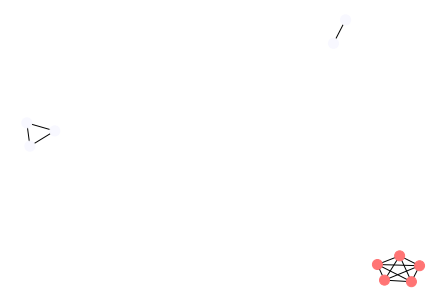

In [26]:
# 5: plot eigenfunctions
nx.draw(G, node_color = b[:,0] , node_size=100, cmap=plt.cm.bwr, vmin=np.min(b), vmax=np.max(b))
plt.show()

In [ ]:
dd = sio.loadmat('./data/minnesota_g.mat')

A = dd['A']
A = A.astype(np.int32)
pos = dd['pos']

G = nx.from_numpy_matrix(A)

D = np.sum(A, axis=0)
L =   np.diag(D) - A
a,b = np.linalg.eigh(L)

nx.draw(G, pos, node_color=b[:,2], node_size=20)
plt.show()

# Spectral clustering

Here we use the spectral embedding to cluster the nodes of a graph.

The tasks are:
- Compute the Laplacian
- Compute the eigendecomposition of the Laplacian
- Use KMeans to cluster the graph
- Draw the 

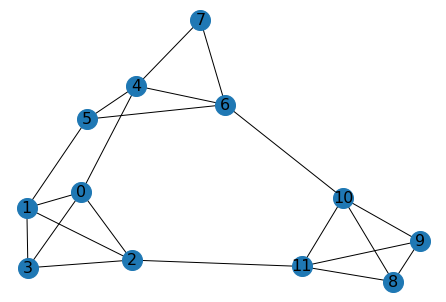

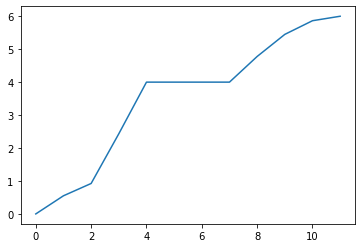

In [31]:
np.random.seed(10)

# 1: Build graph
s = np.asarray([1, 1,  2, 2, 3, 5, 5, 5, 6, 7, 9, 9, 9, 10, 10, 11, 1, 2, 3, 7, 1])-1;
t = np.asarray([2, 3,  3, 4, 4, 6, 7, 8, 7, 8, 10, 11, 12, 11, 12, 12, 5, 6, 12, 11, 4])-1;
n = np.max((np.max(s),np.max(t)))+1
labels={i: str(i) for i in np.arange(n)}


A = np.zeros((n,n))
A[s,t]=1
A = np.logical_or(A, A.T).astype(np.int32)

G = nx.from_numpy_matrix(A)
nx.draw(G, labels = labels, node_size=400, font_size=16)
plt.show()

# 2: Compute Laplacian
D = np.sum(A, axis=0)
L =   np.diag(D) - A
a,b = np.linalg.eigh(L)

# 3: Visualize eigenvalues
plt.plot(a)
plt.show()


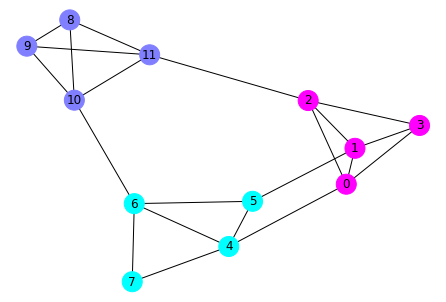

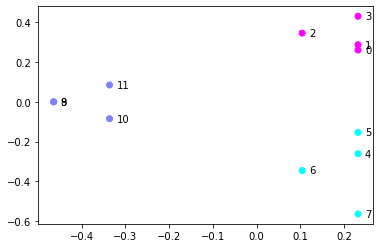

In [38]:
# 4: Defininig the number of clusters and using KMeans

n_c = 3
kmeans = KMeans(n_clusters=n_c, random_state=1).fit(b[:,1:n_c])

#5 : Visualize graph
nx.draw(G, node_color=kmeans.labels_ , labels = labels, node_size=400, cmap=plt.cm.cool,vmin=np.min(kmeans.labels_), vmax=np.max(kmeans.labels_))
plt.show()

#6 : Visualize spectral embedding (first two eigenvectors) with labels
plt.scatter(b[:,1], b[:,2],c=kmeans.labels_,cmap=plt.cm.cool,vmin=np.min(kmeans.labels_), vmax=np.max(kmeans.labels_))

for x_pos, y_pos, label in zip(b[:,1], b[:,2], labels):
    plt.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.show()